In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Good Neighbor Sam,1964
1,11 x 14,1977
2,Santa Paws 2: The Santa Pups,2012
3,The Dictator,1922
4,Con el alma,1995


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [5]:
g = titles.groupby('title').size().sort_values(ascending=False)
g[0:10]

title
Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
Maya                    12
The Outsider            12
The Three Musketeers    11
Freedom                 11
Othello                 11
Honeymoon               11
dtype: int64

### Which three years of the 1930s saw the most films released?

In [6]:
g30s = titles[((titles.year // 10) == 193)]
g30s = g30s\
        .groupby('year').size()\
        .sort_values(ascending=False)
g30s[0:3]

year
1937    1224
1936    1169
1938    1163
dtype: int64

### Plot the number of films that have been released each decade over the
history of cinema.

In [7]:
d = titles
decades = (d.year // 10) * 10
d = d.groupby(decades).size()

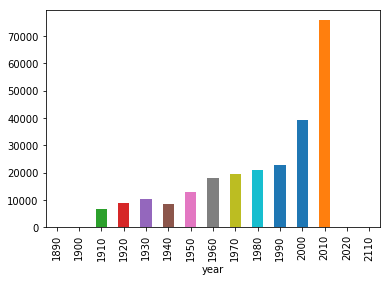

In [8]:
d.plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

In [9]:
ham = titles[titles.title == "Hamlet"]
decades = (ham.year // 10) * 10
ham = ham.groupby(decades).size()
ham

year
1910    3
1920    1
1940    1
1950    1
1960    2
1970    2
1980    1
1990    2
2000    2
2010    5
dtype: int64

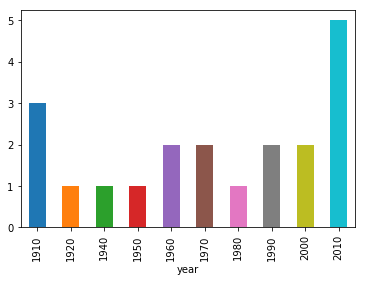

In [10]:
ham.plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of
film.

In [11]:
c = cast
c.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [12]:
ru = c[c.character == 'Rustler']
decades = (ru.year // 10) * 10
ru = ru.groupby(decades).size()

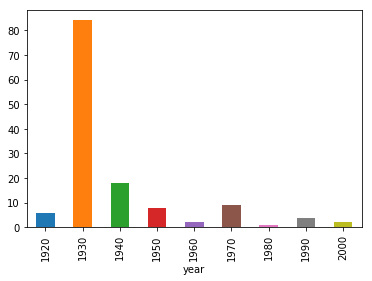

In [13]:
ru.plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

In [14]:
ham = c[c.character == 'Hamlet']
decades = (ham.year // 10) * 10
ham = ham.groupby(decades).size()

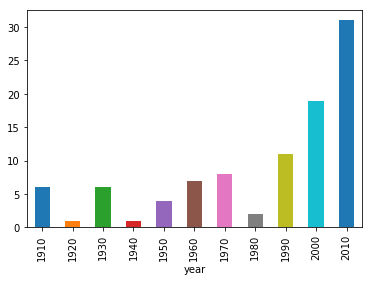

In [15]:
ham.plot(kind='bar')

### What are the 11 most common character names in movie history?

In [16]:
cg = c\
     .groupby('character')\
     .size()\
     .sort_values(ascending=False)
cg[0:11]

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [17]:
hrs = c[c.character == 'Herself']
hrs.head()

,title,year,name,type,character,n
119017,Alexander Jamieson,2017,Etta Baker,actor,Herself,NaN
199920,Le fils de Gascogne,1995,Ren? Biaggi,actor,Herself,22.0
212911,Forty Shades of Blue,2005,J. Blackfoot,actor,Herself,7.0
213254,Wienfilm 1896-1976,1976,Moucle Blackout,actor,Herself,NaN
231656,Not Another B Movie,2010,Babette Bombshell,actor,Herself,19.0


In [18]:
p = hrs\
      .groupby('name')\
      .size()\
      .sort_values(ascending=False)
p[0:10]

name
Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marilyn Monroe                6
Rekha                         6
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [19]:
hms = c[c.character == 'Himself']
hms.head()

,title,year,name,type,character,n
35,Been Down So Long It Looks Like Up to Me,1971,Murray the 'K',actor,Himself,NaN
36,I Wanna Hold Your Hand,1978,Murray the 'K',actor,Himself,48.0
55,Whitefolks,2017,Darryel 'Original Whitefolks' Woodson,actor,Himself,14.0
96,Love Hollywood Style,2006,Mac 10,actor,Himself,NaN
100,Malibu Horror Story,2018,12th Planet,actor,Himself,21.0


In [20]:
p = hms\
      .groupby('name')\
      .size()\
      .sort_values(ascending=False)
p[0:10]

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [21]:
yr = c[c.year == 1945]
yr.head()

,title,year,name,type,character,n
456,Ristikon varjossa,1945,Heikki Aaltoila,actor,Musician,NaN
881,Kolmastoista koputus,1945,Kaarlo Aavajoki,actor,Grisu,17.0
884,Valkoisen neilikan velho,1945,Kaarlo Aavajoki,actor,Romsu,10.0
1874,God Is My Co-Pilot,1945,Leo Abbey,actor,Ground Crewman,NaN
2014,Bud Abbott and Lou Costello in Hollywood,1945,Bud Abbott,actor,Buzz Kurtis,1.0


In [22]:
yr = yr\
      .groupby('name')\
      .size()\
      .sort_values(ascending=False)
yr[0:5]

name
Emmett Vogan       39
Sam (II) Harris    33
Bess Flowers       29
Harold Miller      29
Franklyn Farnum    27
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [23]:
yr = c[c.year == 1985]
yr.head()

,title,year,name,type,character,n
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
480,Hei kliffaa hei!,1985,Risto Aaltonen,actor,Taksikuski,9.0
512,Inferno in diretta,1985,Willie Aames,actor,Tommy Allo,3.0
640,Big Deal,1985,Bob Aaron,actor,Cabbie,20.0
658,A Chorus Line,1985,Eric Aaron,actor,Dancer,NaN


In [24]:
yr = yr\
      .groupby('name')\
      .size()\
      .sort_values(ascending=False)
yr[0:5]

name
Mammootty        22
Shakti Kapoor    21
Sukumari         20
Raj Babbar       15
Aruna Irani      15
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

In [25]:
mmty = c[c.name == 'Mammootty']
mmty.head()

,title,year,name,type,character,n
1418572,1993 Bombay March 12,2011,Mammootty,actor,Sathananda Bhatt,1.0
1418573,1993 Bombay March 12,2011,Mammootty,actor,Samir,1.0
1418574,Aa Neram Alppa Dooram,1985,Mammootty,actor,Jameskutty,1.0
1418575,Aa Rathri,1983,Mammootty,actor,Ravi,1.0
1418576,Aalkkoottathil Thaniye,1984,Mammootty,actor,Rajan,1.0


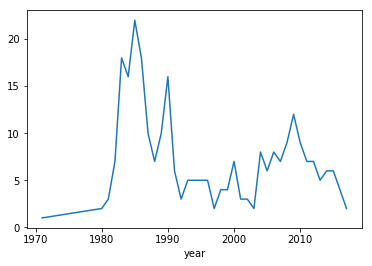

In [26]:
mmty = mmty.groupby('year').character.size()
mmty.plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [27]:
p = c[c.character.str.startswith('Patron in')]
p.loc[:, 'character'] = p.character.str.lower()
p.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,title,year,name,type,character,n
21431,Let It Ride,1989,Ralph Ahn,actor,patron in chinese restaurant,43.0
24676,Alex Cross,2012,Anthony Akins,actor,patron in restaurant,NaN
26285,Missing Pieces,2012,Rico Alago,actor,patron in restaurant,NaN
31259,The Black Bird,1975,John Alderman,actor,patron in ballroom,NaN
33491,Sparkle,2012,Eligah Alexander Jr.,actor,patron in audience,NaN


In [28]:
p = p.groupby('character').size().sort_values(ascending=False)
p[0:10]

character
patron in frisky rabbit         16
patron in chinese restaurant     9
patron in the coffee house       9
patron in restaurant             7
patron in billiard parlor        5
patron in bar                    4
patron in cabaret                3
patron in club                   3
patron in quiet bar              2
patron in booth                  2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [29]:
p = c[c.character.str.startswith('Science')]
p.loc[:, 'character'] = p.character.str.lower()
p.head()

,title,year,name,type,character,n
12200,Teen Wolf Too,1987,Matthew T. Adams,actor,science student,NaN
33439,Three O'Clock High,1987,Michael Alex,actor,science kid,25.0
90372,Mutant Chronicles,2008,Roger Ashton-Griffiths,actor,science monk,13.0
92245,Infini,2015,Anthony (V) Assante,actor,science officer 3,33.0
139980,The Giggles,2013,Kevin Barnstein,actor,science performer 3,19.0


In [30]:
p = p.groupby('character').size().sort_values(ascending=False)
p[0:10]

character
science teacher         63
science fair student     9
science student          9
science fair judge       6
science kid              5
science club member      5
science fair kid         5
science promo cadet      5
science reporter         5
science                  4
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

In [31]:
j = c[c.name == 'Judi Dench']
j.head()

,title,year,name,type,character,n
2814206,84 Charing Cross Road,1987,Judi Dench,actress,Nora Doel,3.0
2814207,A Handful of Dust,1988,Judi Dench,actress,Mrs. Beaver,13.0
2814208,A Midsummer Night's Dream,1968,Judi Dench,actress,Titania,16.0
2814209,A Room with a View,1985,Judi Dench,actress,"Eleanor Lavish, a novelist",7.0
2814210,A Study in Terror,1965,Judi Dench,actress,Sally,8.0


In [32]:
j = j[['year', 'n']]
j.head()

,year,n
2814206,1987,3.0
2814207,1988,13.0
2814208,1968,16.0
2814209,1985,7.0
2814210,1965,8.0


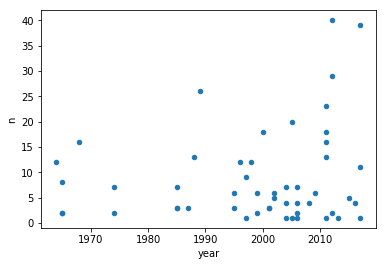

In [33]:
j.plot(kind='scatter', x='year', y='n')

### Plot the n-values of Cary Grant's roles through his career.

In [34]:
j = c[c.name == 'Cary Grant']
j.head()

,title,year,name,type,character,n
871388,Alice in Wonderland,1933,Cary Grant,actor,Mock Turtle,10.0
871389,An Affair to Remember,1957,Cary Grant,actor,Nickie Ferrante,1.0
871390,Arsenic and Old Lace,1944,Cary Grant,actor,Mortimer Brewster,1.0
871391,Big Brown Eyes,1936,Cary Grant,actor,Danny Barr,1.0
871392,Blonde Venus,1932,Cary Grant,actor,Nick Townsend,3.0


In [35]:
j = j[['year', 'n']]
j.head()

,year,n
871388,1933,10.0
871389,1957,1.0
871390,1944,1.0
871391,1936,1.0
871392,1932,3.0


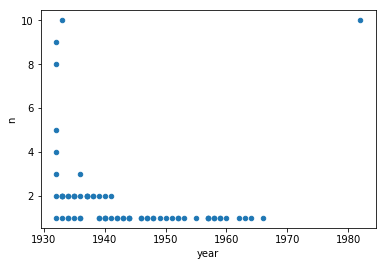

In [36]:
j.plot(kind='scatter', x='year', y='n')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

In [37]:
j = c[c.name == 'Sidney Poitier']
j.head()

,title,year,name,type,character,n
1816209,A Patch of Blue,1965,Sidney Poitier,actor,Gordon Ralfe,1.0
1816210,A Piece of the Action,1977,Sidney Poitier,actor,Manny Durrell,1.0
1816211,A Raisin in the Sun,1961,Sidney Poitier,actor,Walter Lee Younger,1.0
1816212,A Warm December,1973,Sidney Poitier,actor,Dr. Matt Younger,1.0
1816213,All the Young Men,1960,Sidney Poitier,actor,Sgt. Eddie Towler,2.0


In [38]:
j = j[['year', 'n']]
j.head()

,year,n
1816209,1965,1.0
1816210,1977,1.0
1816211,1961,1.0
1816212,1973,1.0
1816213,1960,2.0


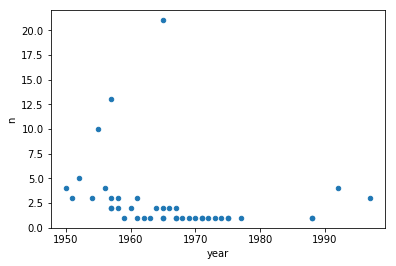

In [39]:
j.plot(kind='scatter', x='year', y='n')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [40]:
is1950s = (c.year // 10) == 195
yrs_n = c[is1950s & (c.n == 1)]
yrs_n.head()

,title,year,name,type,character,n
2004,Abbott and Costello Go to Mars,1953,Bud Abbott,actor,Lester,1.0
2005,Abbott and Costello in the Foreign Legion,1950,Bud Abbott,actor,Bud Jones,1.0
2006,Abbott and Costello Meet Captain Kidd,1952,Bud Abbott,actor,Rocky Stonebridge,1.0
2007,Abbott and Costello Meet Dr. Jekyll and Mr. Hyde,1953,Bud Abbott,actor,Slim,1.0
2008,Abbott and Costello Meet the Keystone Kops,1955,Bud Abbott,actor,Harry 'Slim' Pierce,1.0


In [41]:
yrs_n = yrs_n.groupby('type').size()
yrs_n

type
actor      6692
actress    3040
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [42]:
is1950s = (c.year // 10) == 195
yrs_n = c[is1950s & (c.n == 2)]
yrs_n.head()

,title,year,name,type,character,n
1189,Bashi-Achuki,1956,Dodo Abashidze,actor,Abdoushahili,2.0
2275,The Invisible Boy,1957,Philip Abbott,actor,Dr. Tom Merrinoe,2.0
7400,A los cuatro vientos,1955,Miguel Aceves Mej?a,actor,Pablo G?lvez,2.0
7406,Cuatro copas,1958,Miguel Aceves Mej?a,actor,Miguel,2.0
10303,Private's Progress,1956,Ronald Adam,actor,Doctor at Medical,2.0


In [43]:
yrs_n = yrs_n.groupby('type').size()
yrs_n

type
actor      4640
actress    4635
dtype: int64